Saving Netflix Dataset.csv to Netflix Dataset (5).csv
Dataset Shape: (7789, 11)

Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']


/tmp/ipython-input-1714593726.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='coolwarm')


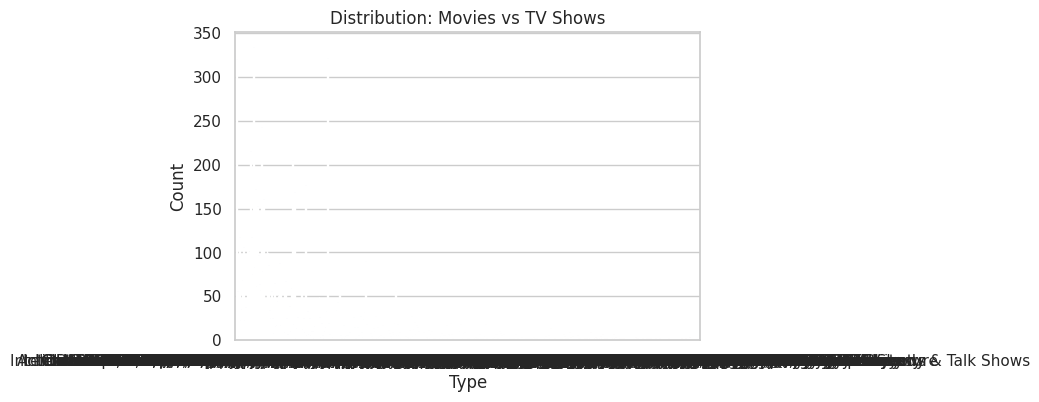

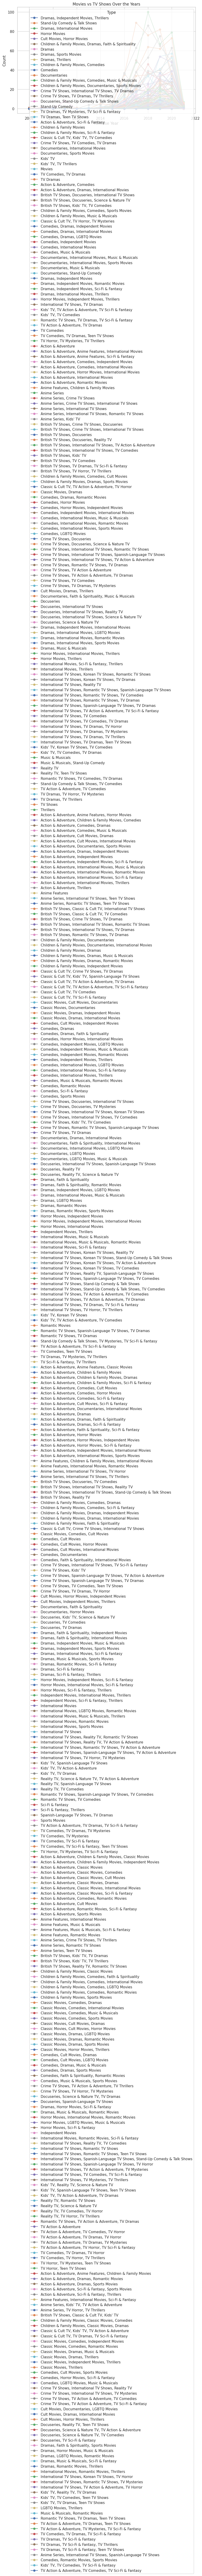

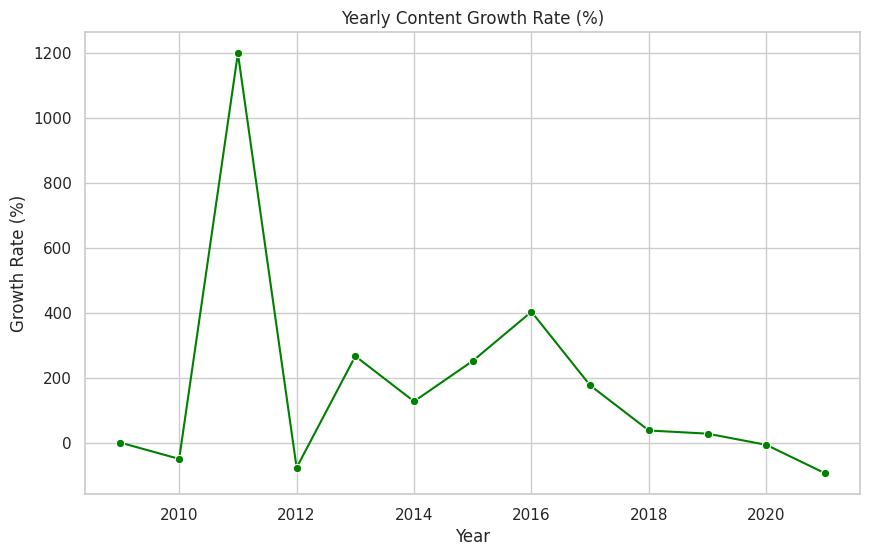

/tmp/ipython-input-1714593726.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


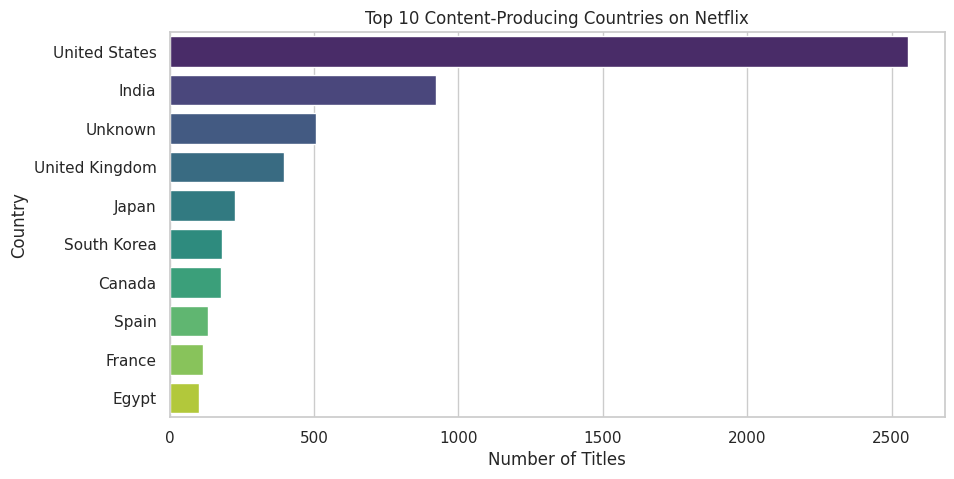

/tmp/ipython-input-1714593726.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='cubehelix')


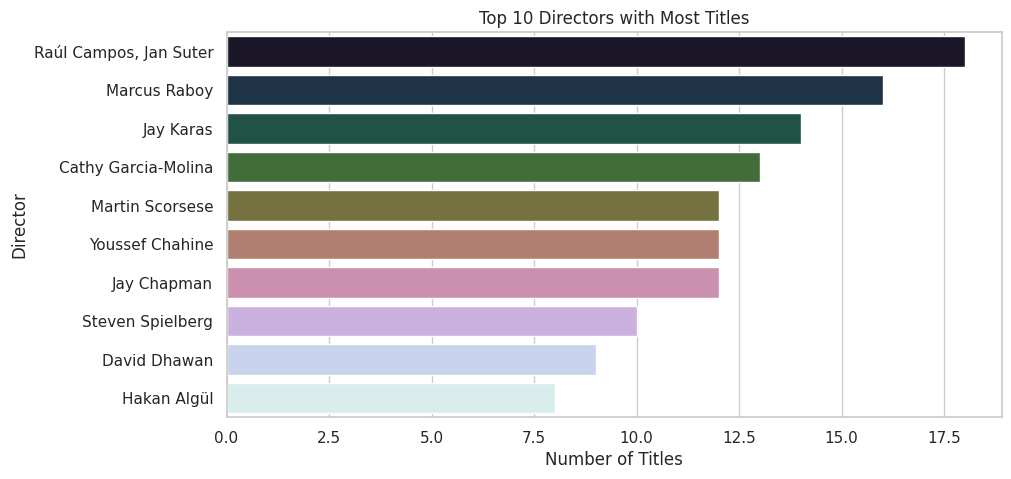

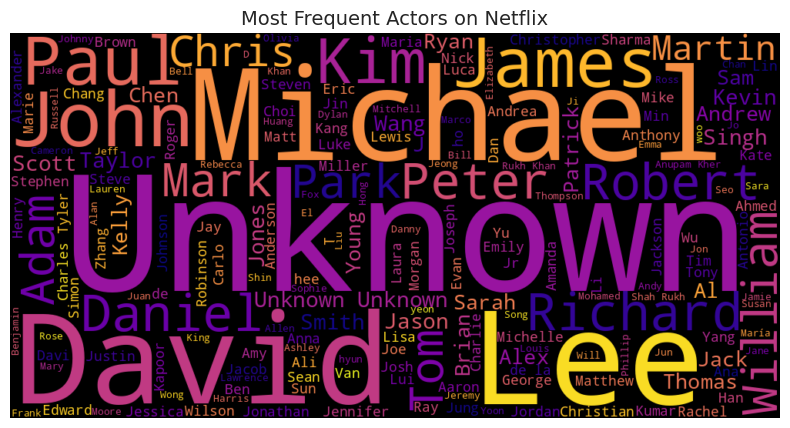

KeyError: 'listed_in'

In [ ]:
# ------------------------------------------
# Netflix Dataset Analysis – Major Project (Extended Version)
# Problem Statement: Content Trends Analysis for Strategic Recommendations
# ------------------------------------------

# 1️⃣ Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
from google.colab import files

uploaded = files.upload()

# Set style for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# 2️⃣ Load Dataset
df = pd.read_csv("Netflix Dataset.csv")
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# 3️⃣ Data Preprocessing
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df['country'] = df['country'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')

# Convert dates
if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    df['year_added'] = df['date_added'].dt.year
    df['month_added'] = df['date_added'].dt.month
else:
    df['year_added'] = np.nan
    df['month_added'] = np.nan

# Extract release year
if 'release_year' not in df.columns:
    df['release_year'] = df['release_date'].astype(str).str.extract(r'(\d{4})')

df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# ------------------------------------------
# 4️⃣ Exploratory Analysis
# ------------------------------------------

# Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='coolwarm')
plt.title("Distribution: Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

# Movies vs TV Shows over years
content_trend = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
content_trend.plot(marker='o')
plt.title("Movies vs TV Shows Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.legend(title="Type")
plt.grid(True)
# Adjust x-axis limits to prevent lines from being cut off
plt.xlim(content_trend.index.min() - 1, content_trend.index.max() + 1)
plt.show()

# Yearly content growth rate
df_year = df.groupby('release_year').size().reset_index(name='count')
df_year['growth_rate'] = df_year['count'].pct_change() * 100

plt.figure(figsize=(10,6))
sns.lineplot(data=df_year, x='release_year', y='growth_rate', marker='o', color='green')
plt.title("Yearly Content Growth Rate (%)")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.grid(True)
plt.show()

# Top 10 countries
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Content-Producing Countries on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

# Genre analysis
if 'listed_in' in df.columns:
    all_genres = df['listed_in'].dropna().str.split(', ')
    genre_counts = pd.Series([g for sub in all_genres for g in sub]).value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="magma")
    plt.title("Top 10 Genres on Netflix")
    plt.xlabel("Number of Titles")
    plt.ylabel("Genre")
    plt.show()

# ------------------------------------------
# 5️⃣ Deep Insights
# ------------------------------------------

# Top 10 Directors
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='cubehelix')
plt.title("Top 10 Directors with Most Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

# Word Cloud: Actors
from wordcloud import STOPWORDS
actor_text = ' '.join(df['cast'].dropna().astype(str))
wc = WordCloud(stopwords=STOPWORDS, background_color='black', width=1000, height=500, colormap='plasma').generate(actor_text)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Actors on Netflix", fontsize=14)
plt.show()

# Word Cloud: Genres
genre_text = ' '.join(df['listed_in'].dropna().astype(str))
wc_genre = WordCloud(stopwords=STOPWORDS, background_color='white', colormap='inferno', width=1000, height=500).generate(genre_text)
plt.figure(figsize=(10,5))
plt.imshow(wc_genre, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Genres", fontsize=14)
plt.show()

# ------------------------------------------
# 6️⃣ Duration Analysis (Movies only)
# ------------------------------------------
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration'] = df_movies['duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(10,5))
sns.histplot(df_movies['duration'], bins=30, kde=True, color='coral')
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()

# Correlation between duration & genre
df_genre = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in').copy()
genre_duration = df_genre[df_genre['type'] == 'Movie'].groupby('listed_in')['duration'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=genre_duration.values, y=genre_duration.index, palette='cool')
plt.title("Average Movie Duration by Genre")
plt.xlabel("Average Duration (minutes)")
plt.ylabel("Genre")
plt.show()

# ------------------------------------------
# 7️⃣ Content Added by Month
# ------------------------------------------
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_content = df['month_added'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=month_names, y=monthly_content.values, palette='crest')
plt.title("Content Release Pattern by Month (Added to Netflix)")
plt.xlabel("Month")
plt.ylabel("Number of Titles Added")
plt.show()

# ------------------------------------------
# 8️⃣ Netflix Originals Estimation
# ------------------------------------------
df['is_original'] = df['title'].apply(lambda x: 1 if 'Netflix' in str(x) else 0)
original_counts = df['is_original'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=['Licensed', 'Netflix Originals'], y=original_counts.values, palette='rocket')
plt.title("Estimated Netflix Originals vs Licensed Content")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

# ------------------------------------------
# 9️⃣ Final Insights & Recommendations
# ------------------------------------------
print("\n✅ **Insights:**")
print("- Netflix primarily features Movies, but TV Show production is increasing post-2017.")
print("- Top genres include Drama, Comedy, and International content.")
print("- The USA, India, and the UK lead in content contribution.")
print("- Content additions peak between October and December, indicating strategic Q4 launches.")
print("- Average movie duration lies around 100 minutes, with Action and Drama tending longer.")

print("\n🎯 **Strategic Recommendations:**")
print("- Expand investment in regional content, especially in Asia and Europe.")
print("- Continue boosting Netflix Originals for global retention and brand identity.")
print("- Optimize release schedules around festive seasons (Oct–Dec).")
print("- Introduce shorter series or mini-documentaries for emerging markets.")
print("- Analyze genre-duration correlations for better content pacing and engagement.")

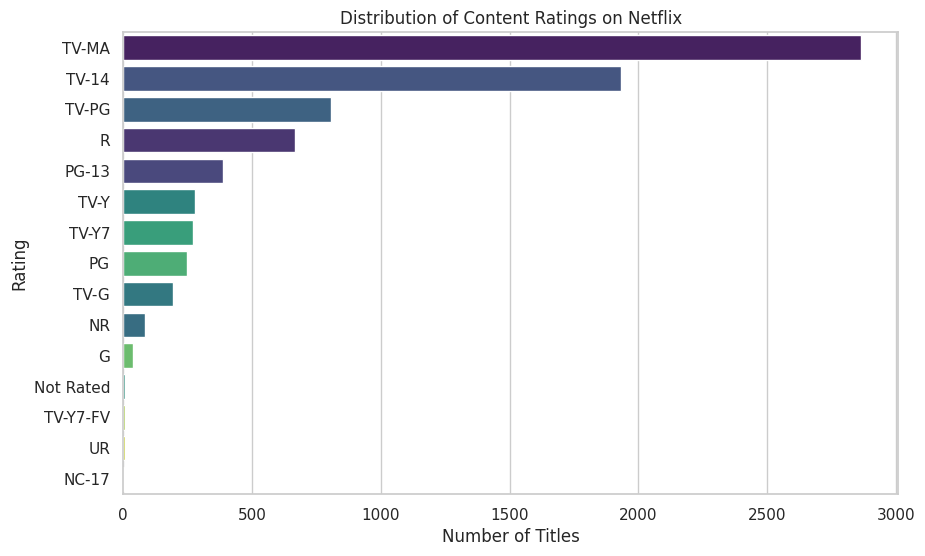

In [ ]:
# ------------------------------------------
# 📊 4. Exploratory Data Analysis (EDA) - Continued
# ------------------------------------------

# 4.6 Content Ratings Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='viridis', hue='rating', legend=False)
plt.title("Distribution of Content Ratings on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.show()